# LIBRARY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Dataset

In [4]:
dt = pd.read_csv('final_dataset_v2_no_NA.csv')

In [5]:
df = dt.copy()
df.head()

,Unnamed: 0,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1395,Room 1,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,1,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1396,Room 2,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,2,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1397,Room 3,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,3,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1398,Room 4,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,4,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1399,Room 5,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189


# EDA & Preprocessing

In [6]:
area_name = df['area_name']
property_type = df['property_type']
unit = df['unit_type']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['area_name'] = label_encoder.fit_transform(df['area_name'])
# df['unit_id'] = df['unit_id'].str[2:].astype(int)
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['property_name'] = label_encoder.fit_transform(df['property_name'])
df['unit_type'] = label_encoder.fit_transform(df['unit_type'])
df = df.drop(columns=['Unnamed: 0'])
df

,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,PR0057,62,7,0,UN1395,Room 1,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,0,PR0057,62,7,0,UN1396,Room 2,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,0,PR0057,62,7,0,UN1397,Room 3,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,0,PR0057,62,7,0,UN1398,Room 4,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,0,PR0057,62,7,0,UN1399,Room 5,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21,PR0765,23,2,4,UN2884,Istana Dalton - Entire Villa,40,2.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1,1.160921e+06,86.0,4.757937
327,21,PR0093,81,4,4,UN1223,Istana Willy - Entire Villa,96,2.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1,1.185920e+06,52.0,4.559767
328,21,PR0557,9,4,4,UN2786,Villa 1,95,4.0,4.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1,1.941470e+06,148.0,4.756757
329,21,PR0417,45,3,4,UN2355,NH Residence 3A,9,3.0,3.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1,1.456936e+06,91.0,4.423888


In [8]:
df = df[['area_name', 'property_name', 'property_type','property_bedrooms', 'unit_type', 'bedroom',
       'bathroom', 'beds', 'wifi', 'tv', 'ac',
       'parking', 'pool', 'breakfast','building_staff',
       'price_per_unit', 'total_bookings','overall_rating']]
df.head()

,area_name,property_name,property_type,property_bedrooms,unit_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,total_bookings,overall_rating
0,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.170735e+06,138.0,4.702576
1,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.201892e+06,143.0,4.824885
2,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.237458e+06,147.0,4.674419
3,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.195869e+06,130.0,4.810275
4,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.189912e+06,130.0,4.794189


In [9]:
df.describe()

,area_name,property_name,property_type,property_bedrooms,unit_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,total_bookings,overall_rating
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,3.310000e+02,331.000000,331.000000
mean,9.293051,41.474320,1.135952,9.821752,52.803625,1.283988,1.317221,1.314199,0.981873,0.465257,0.945619,0.927492,0.691843,0.175227,0.468278,9.000158e+05,97.915408,4.643519
std,7.545132,28.992921,1.692123,13.022182,28.119347,0.733000,0.855803,0.757434,0.133612,0.499547,0.227111,0.259719,0.462431,0.380736,0.499748,6.915879e+05,57.926119,0.211709
min,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.642067e+05,3.000000,3.571429
25%,1.000000,13.500000,0.000000,4.000000,31.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.013948e+05,51.000000,4.527056
50%,9.000000,37.000000,0.000000,6.000000,55.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.809707e+05,93.000000,4.670330
75%,19.000000,64.000000,3.000000,10.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.055762e+06,140.500000,4.792980
max,21.000000,97.000000,4.000000,50.000000,107.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.143933e+06,338.000000,5.000000


0 : 'Guesthouse',
4 : 'Villa',
1 : 'Hostel',
3 : 'Resort',
2 : 'House'

In [ ]:
sns.pairplot(df, hue='property_type')

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df)

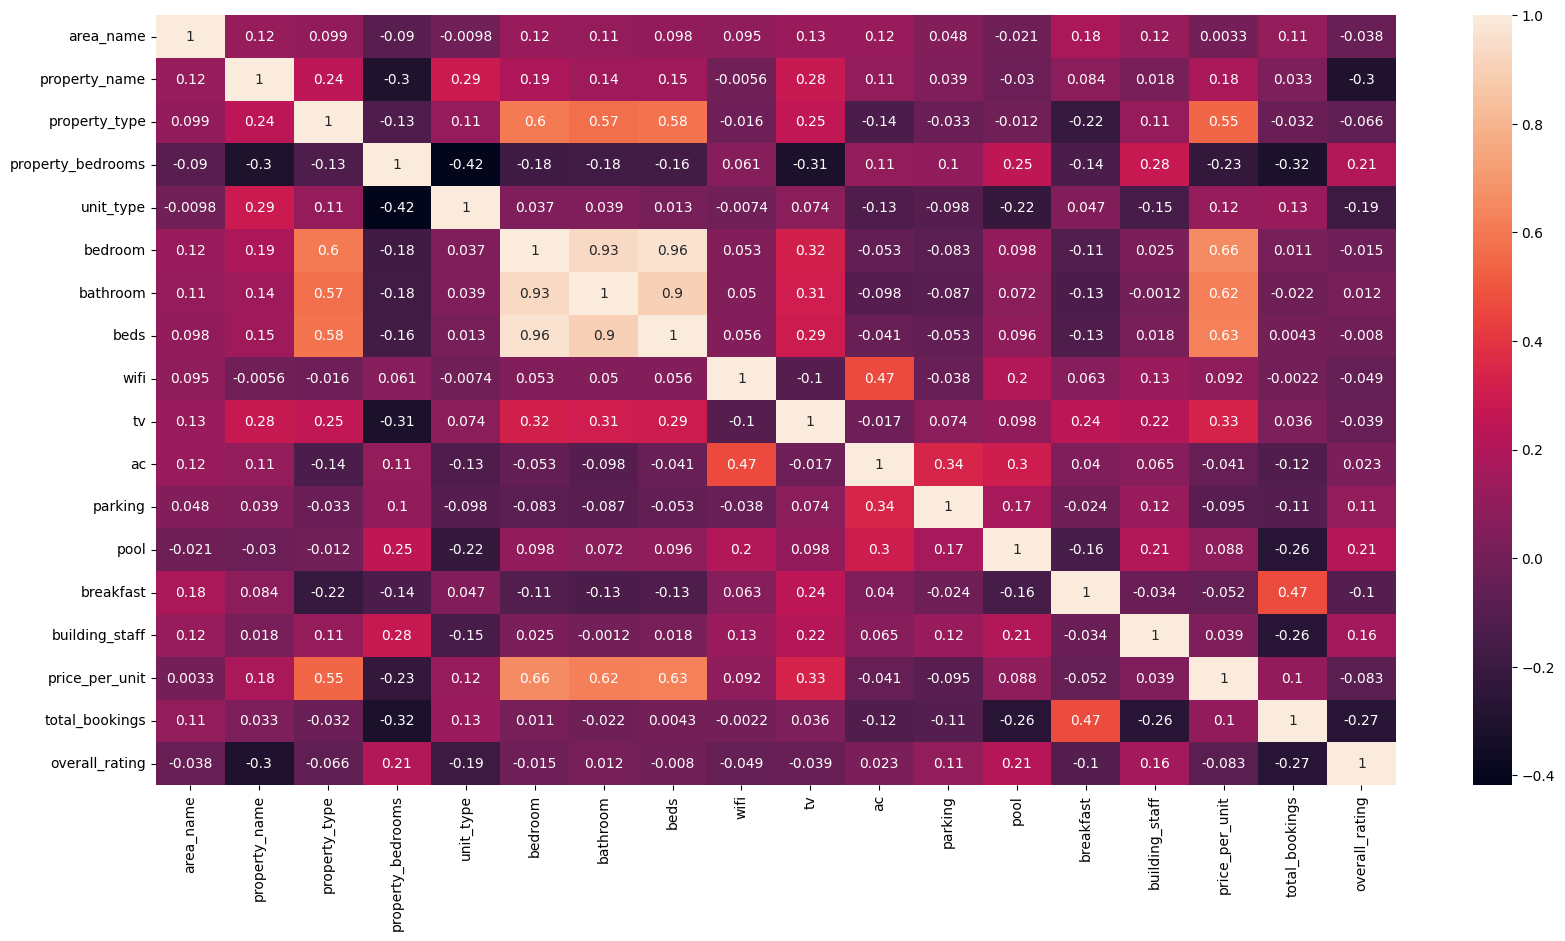

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_name          331 non-null    int64  
 1   property_name      331 non-null    int64  
 2   property_type      331 non-null    int64  
 3   property_bedrooms  331 non-null    int64  
 4   unit_type          331 non-null    int64  
 5   bedroom            331 non-null    float64
 6   bathroom           331 non-null    float64
 7   beds               331 non-null    float64
 8   wifi               331 non-null    float64
 9   tv                 331 non-null    float64
 10  ac                 331 non-null    float64
 11  parking            331 non-null    float64
 12  pool               331 non-null    float64
 13  breakfast          331 non-null    float64
 14  building_staff     331 non-null    float64
 15  price_per_unit     331 non-null    float64
 16  total_bookings     331 non

### Scalling data

In [18]:
from sklearn.preprocessing import StandardScaler
df2 = df.drop(columns=['property_name', 'property_bedrooms', 'total_bookings', 'unit_type'])
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int64  
 1   property_type   331 non-null    int64  
 2   bedroom         331 non-null    float64
 3   bathroom        331 non-null    float64
 4   beds            331 non-null    float64
 5   wifi            331 non-null    float64
 6   tv              331 non-null    float64
 7   ac              331 non-null    float64
 8   parking         331 non-null    float64
 9   pool            331 non-null    float64
 10  breakfast       331 non-null    float64
 11  building_staff  331 non-null    float64
 12  price_per_unit  331 non-null    float64
 13  overall_rating  331 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 36.3 KB


,area_name,property_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,overall_rating
0,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.170735e+06,4.702576
1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.201892e+06,4.824885
2,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.237458e+06,4.674419
3,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.195869e+06,4.810275
4,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.189912e+06,4.794189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21,4,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.160921e+06,4.757937
327,21,4,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.185920e+06,4.559767
328,21,4,4.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.941470e+06,4.756757
329,21,4,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.456936e+06,4.423888


In [19]:
df2['price_per_unit'] = (df2['price_per_unit']  - df2['price_per_unit'].min())/(df2['price_per_unit'].max() - df2['price_per_unit'].min())
#df['total_bookings'] = (df['total_bookings']  - df['total_bookings'].min())/(df['total_bookings'].max() - df['total_bookings'].min())
df2['overall_rating'] = (df2['overall_rating']  - df2['overall_rating'].min())/(df2['overall_rating'].max() - df2['overall_rating'].min())

df2['bedroom'] = (df2['bedroom']  - df2['bedroom'].min())/(df2['bedroom'].max() - df2['bedroom'].min())
df2['bathroom'] = (df2['bathroom']  - df2['bathroom'].min())/(df2['bathroom'].max() - df2['bathroom'].min())
df2['beds'] = (df2['beds']  - df2['beds'].min())/(df2['beds'].max() - df2['beds'].min())

df2['area_name'] = (df2['area_name']  - df2['area_name'].min())/(df2['area_name'].max() - df2['area_name'].min())
df2['property_type'] = (df2['property_type']  - df2['property_type'].min())/(df2['property_type'].max() - df2['property_type'].min())
#df['unit_type'] = (df['unit_type']  - df['unit_type'].min())/(df['unit_type'].max() - df['unit_type'].min())
#df['property_name'] = (df['property_name']  - df['property_name'].min())/(df['property_name'].max() - df['property_name'].min())
#df['property_bedrooms'] = (df['property_bedrooms']  - df['property_bedrooms'].min())/(df['property_bedrooms'].max() - df['property_bedrooms'].min())
df2

,area_name,property_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,overall_rating
0,0.0,0.0,0.00,0.2,0.2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.154179,0.791803
1,0.0,0.0,0.00,0.2,0.2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.159478,0.877419
2,0.0,0.0,0.00,0.2,0.2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.165527,0.772093
3,0.0,0.0,0.00,0.2,0.2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.158453,0.867192
4,0.0,0.0,0.00,0.2,0.2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.157440,0.855932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1.0,1.0,0.25,0.4,0.4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.152509,0.830556
327,1.0,1.0,0.25,0.4,0.6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.156761,0.691837
328,1.0,1.0,0.75,0.8,0.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.285262,0.829730
329,1.0,1.0,0.50,0.6,0.6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.202855,0.596721


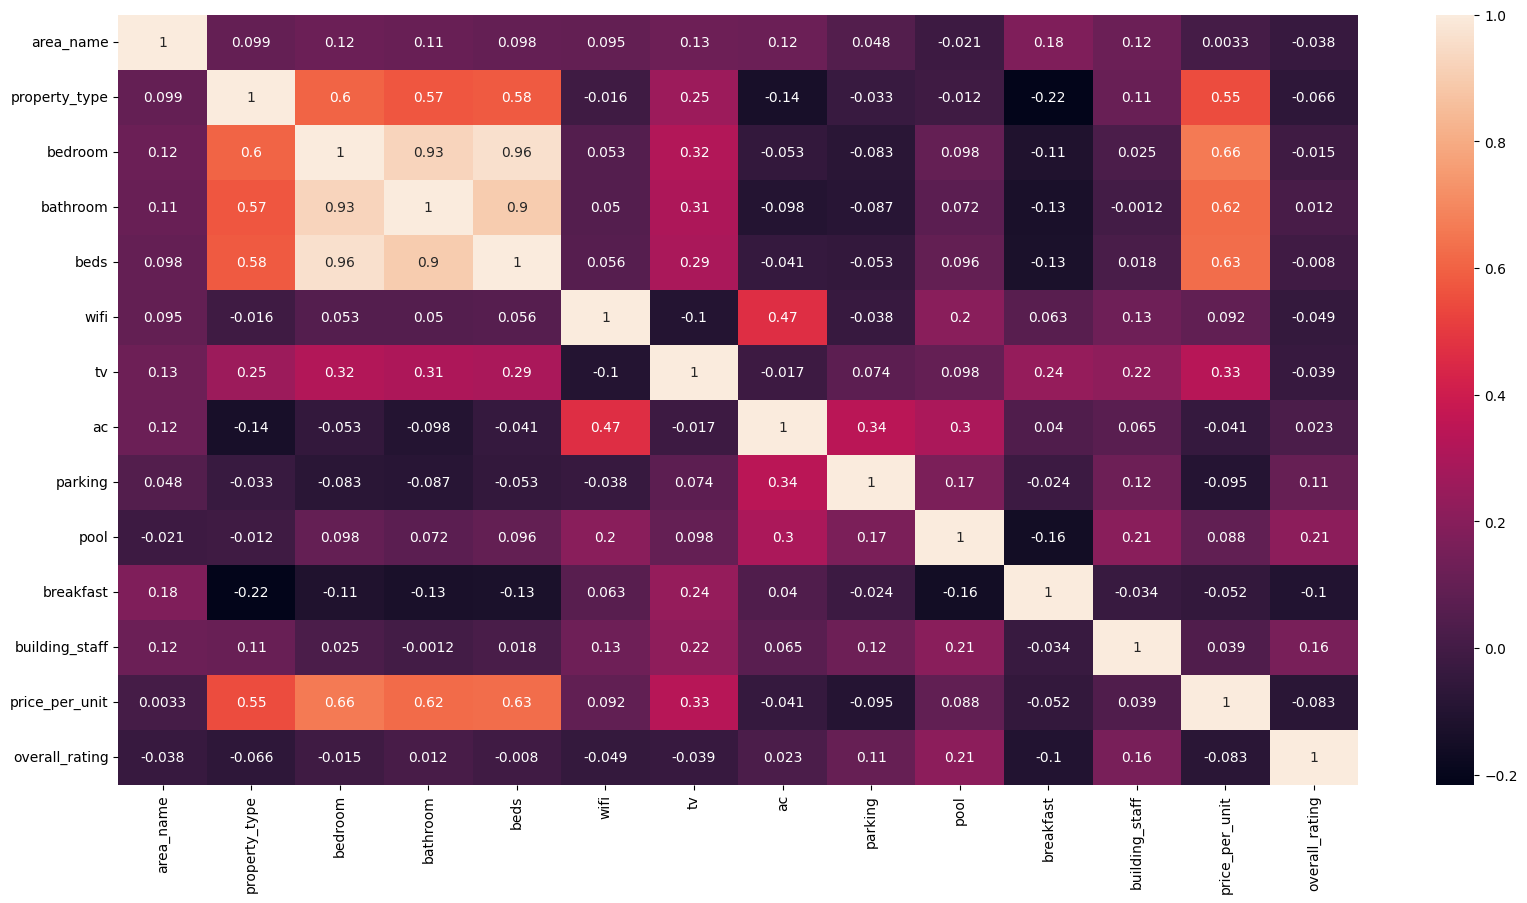

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [21]:
from sklearn.preprocessing import Normalizer, StandardScaler
df2_scaled = Normalizer().fit_transform(df2.values)

In [22]:
df2_scaled

array([[0.   , 0.   , 0.   , ..., 0.   , 0.071, 0.364],
       [0.   , 0.   , 0.   , ..., 0.   , 0.072, 0.397],
       [0.   , 0.   , 0.   , ..., 0.419, 0.069, 0.323],
       ...,
       [0.341, 0.341, 0.256, ..., 0.341, 0.097, 0.283],
       [0.346, 0.346, 0.173, ..., 0.   , 0.07 , 0.206],
       [0.341, 0.341, 0.17 , ..., 0.   , 0.067, 0.264]])

# PCA

In [23]:
from sklearn.decomposition import PCA

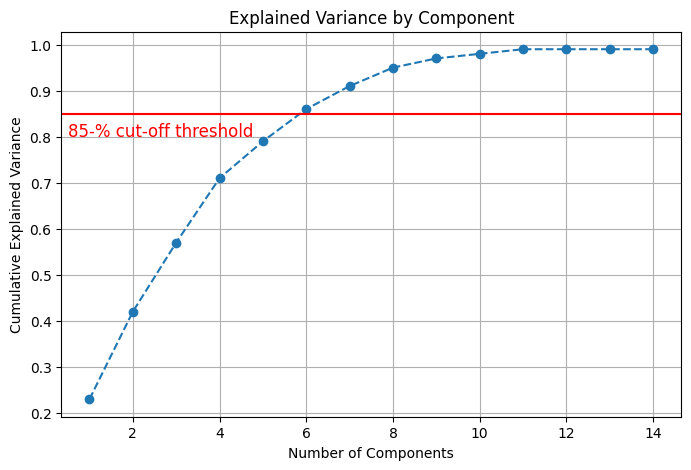

Number of components explaining 80% of the variance: 6


In [26]:
pca = PCA().fit(df2_scaled)

# Explained Variance Ratio
explained_variance_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 2))

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Component')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.80, '85-% cut-off threshold', color='red', fontsize=12)
plt.grid(True)
plt.show()

# Menentukan jumlah komponen yang menjelaskan setidaknya 95% dari varians
n_components = np.argmax(explained_variance_ratio >= 0.85) + 1
print(f'Number of components explaining 80% of the variance: {n_components}')

In [27]:
pca = PCA(n_components = 6)
scores_pca = pca.fit_transform(df2_scaled)

In [28]:
colnames = list(df2.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5]}) #,'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6
0,area_name,0.066215,0.136268,-0.128857,0.323438,0.803854,-0.332016
1,property_type,0.349765,0.091530,0.694160,0.010307,0.174271,0.018133
2,bedroom,0.112856,0.010884,0.164686,-0.064803,0.104348,0.057822
3,bathroom,0.069249,0.056494,0.165784,-0.049295,0.030739,0.107030
4,beds,0.056401,0.038238,0.145115,-0.043914,0.031716,0.061942
5,wifi,-0.208879,0.098072,0.045218,0.103247,-0.083664,0.279181
6,tv,0.698443,-0.018597,-0.274922,-0.480248,-0.098464,-0.208937
7,ac,-0.263991,0.003216,-0.113297,0.003903,0.033190,-0.189880
8,parking,-0.150625,0.012186,-0.092458,-0.021482,-0.222320,-0.695873
9,pool,-0.260107,-0.695670,0.011361,-0.496816,0.380988,0.104087


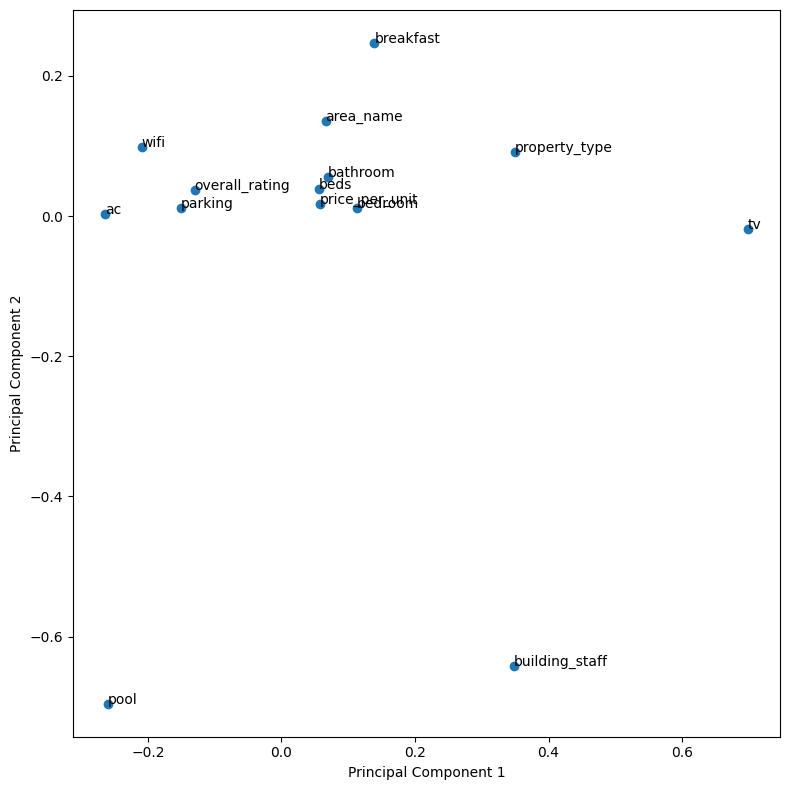

In [29]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Analyzing PCA Loading

In [30]:
#df3 = df.drop(columns=['property_name', 'property_bedrooms', 'total_bookings', 'unit_type', 'building_staff'])
df3 = df2.copy()

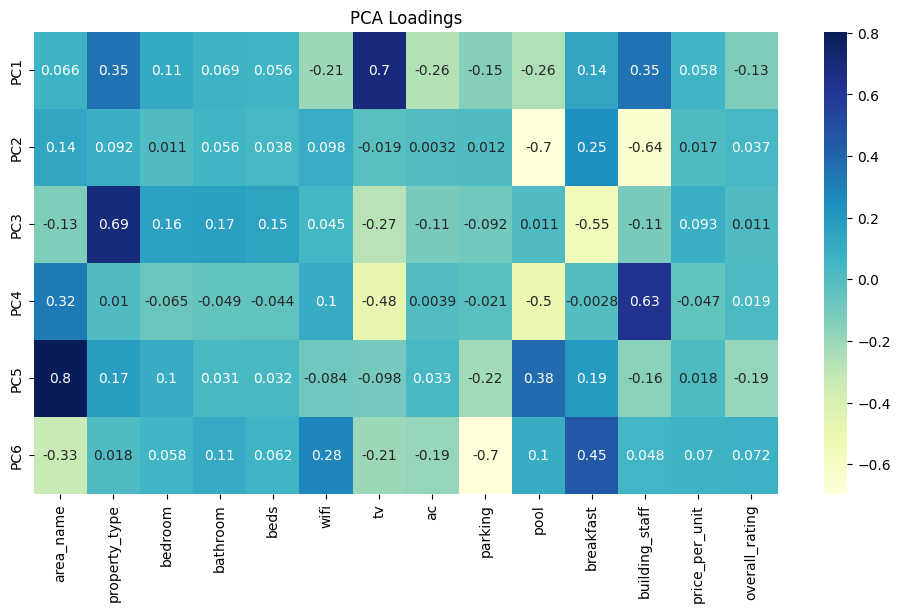

In [32]:
pca_components = pca.components_
pca_loadings_df = pd.DataFrame(pca_components, columns=df3.columns, index=[f'PC{i+1}' for i in range(6)])

# Display the loadings
pca_loadings_df

# Heatmap of the loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [33]:
# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_),
    columns=df3.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Identify the top contributing features for each principal component
top_features_per_pc7 = pca_loadings_analysis.apply(lambda s: s.nlargest(14).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features_per_pc7)

,0
PC1,"[tv, property_type, building_staff, ac, pool, ..."
PC2,"[pool, building_staff, breakfast, area_name, w..."
PC3,"[property_type, breakfast, tv, bathroom, bedro..."
PC4,"[building_staff, pool, tv, area_name, wifi, be..."
PC5,"[area_name, pool, parking, breakfast, overall_..."
PC6,"[parking, breakfast, area_name, wifi, tv, ac, ..."


No charts were generated by quickchart


# Hierarchical

In [34]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [35]:
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6
0,area_name,0.066215,0.136268,-0.128857,0.323438,0.803854,-0.332016
1,property_type,0.349765,0.091530,0.694160,0.010307,0.174271,0.018133
2,bedroom,0.112856,0.010884,0.164686,-0.064803,0.104348,0.057822
3,bathroom,0.069249,0.056494,0.165784,-0.049295,0.030739,0.107030
4,beds,0.056401,0.038238,0.145115,-0.043914,0.031716,0.061942
5,wifi,-0.208879,0.098072,0.045218,0.103247,-0.083664,0.279181
6,tv,0.698443,-0.018597,-0.274922,-0.480248,-0.098464,-0.208937
7,ac,-0.263991,0.003216,-0.113297,0.003903,0.033190,-0.189880
8,parking,-0.150625,0.012186,-0.092458,-0.021482,-0.222320,-0.695873
9,pool,-0.260107,-0.695670,0.011361,-0.496816,0.380988,0.104087


## Linkage

## remove outlier

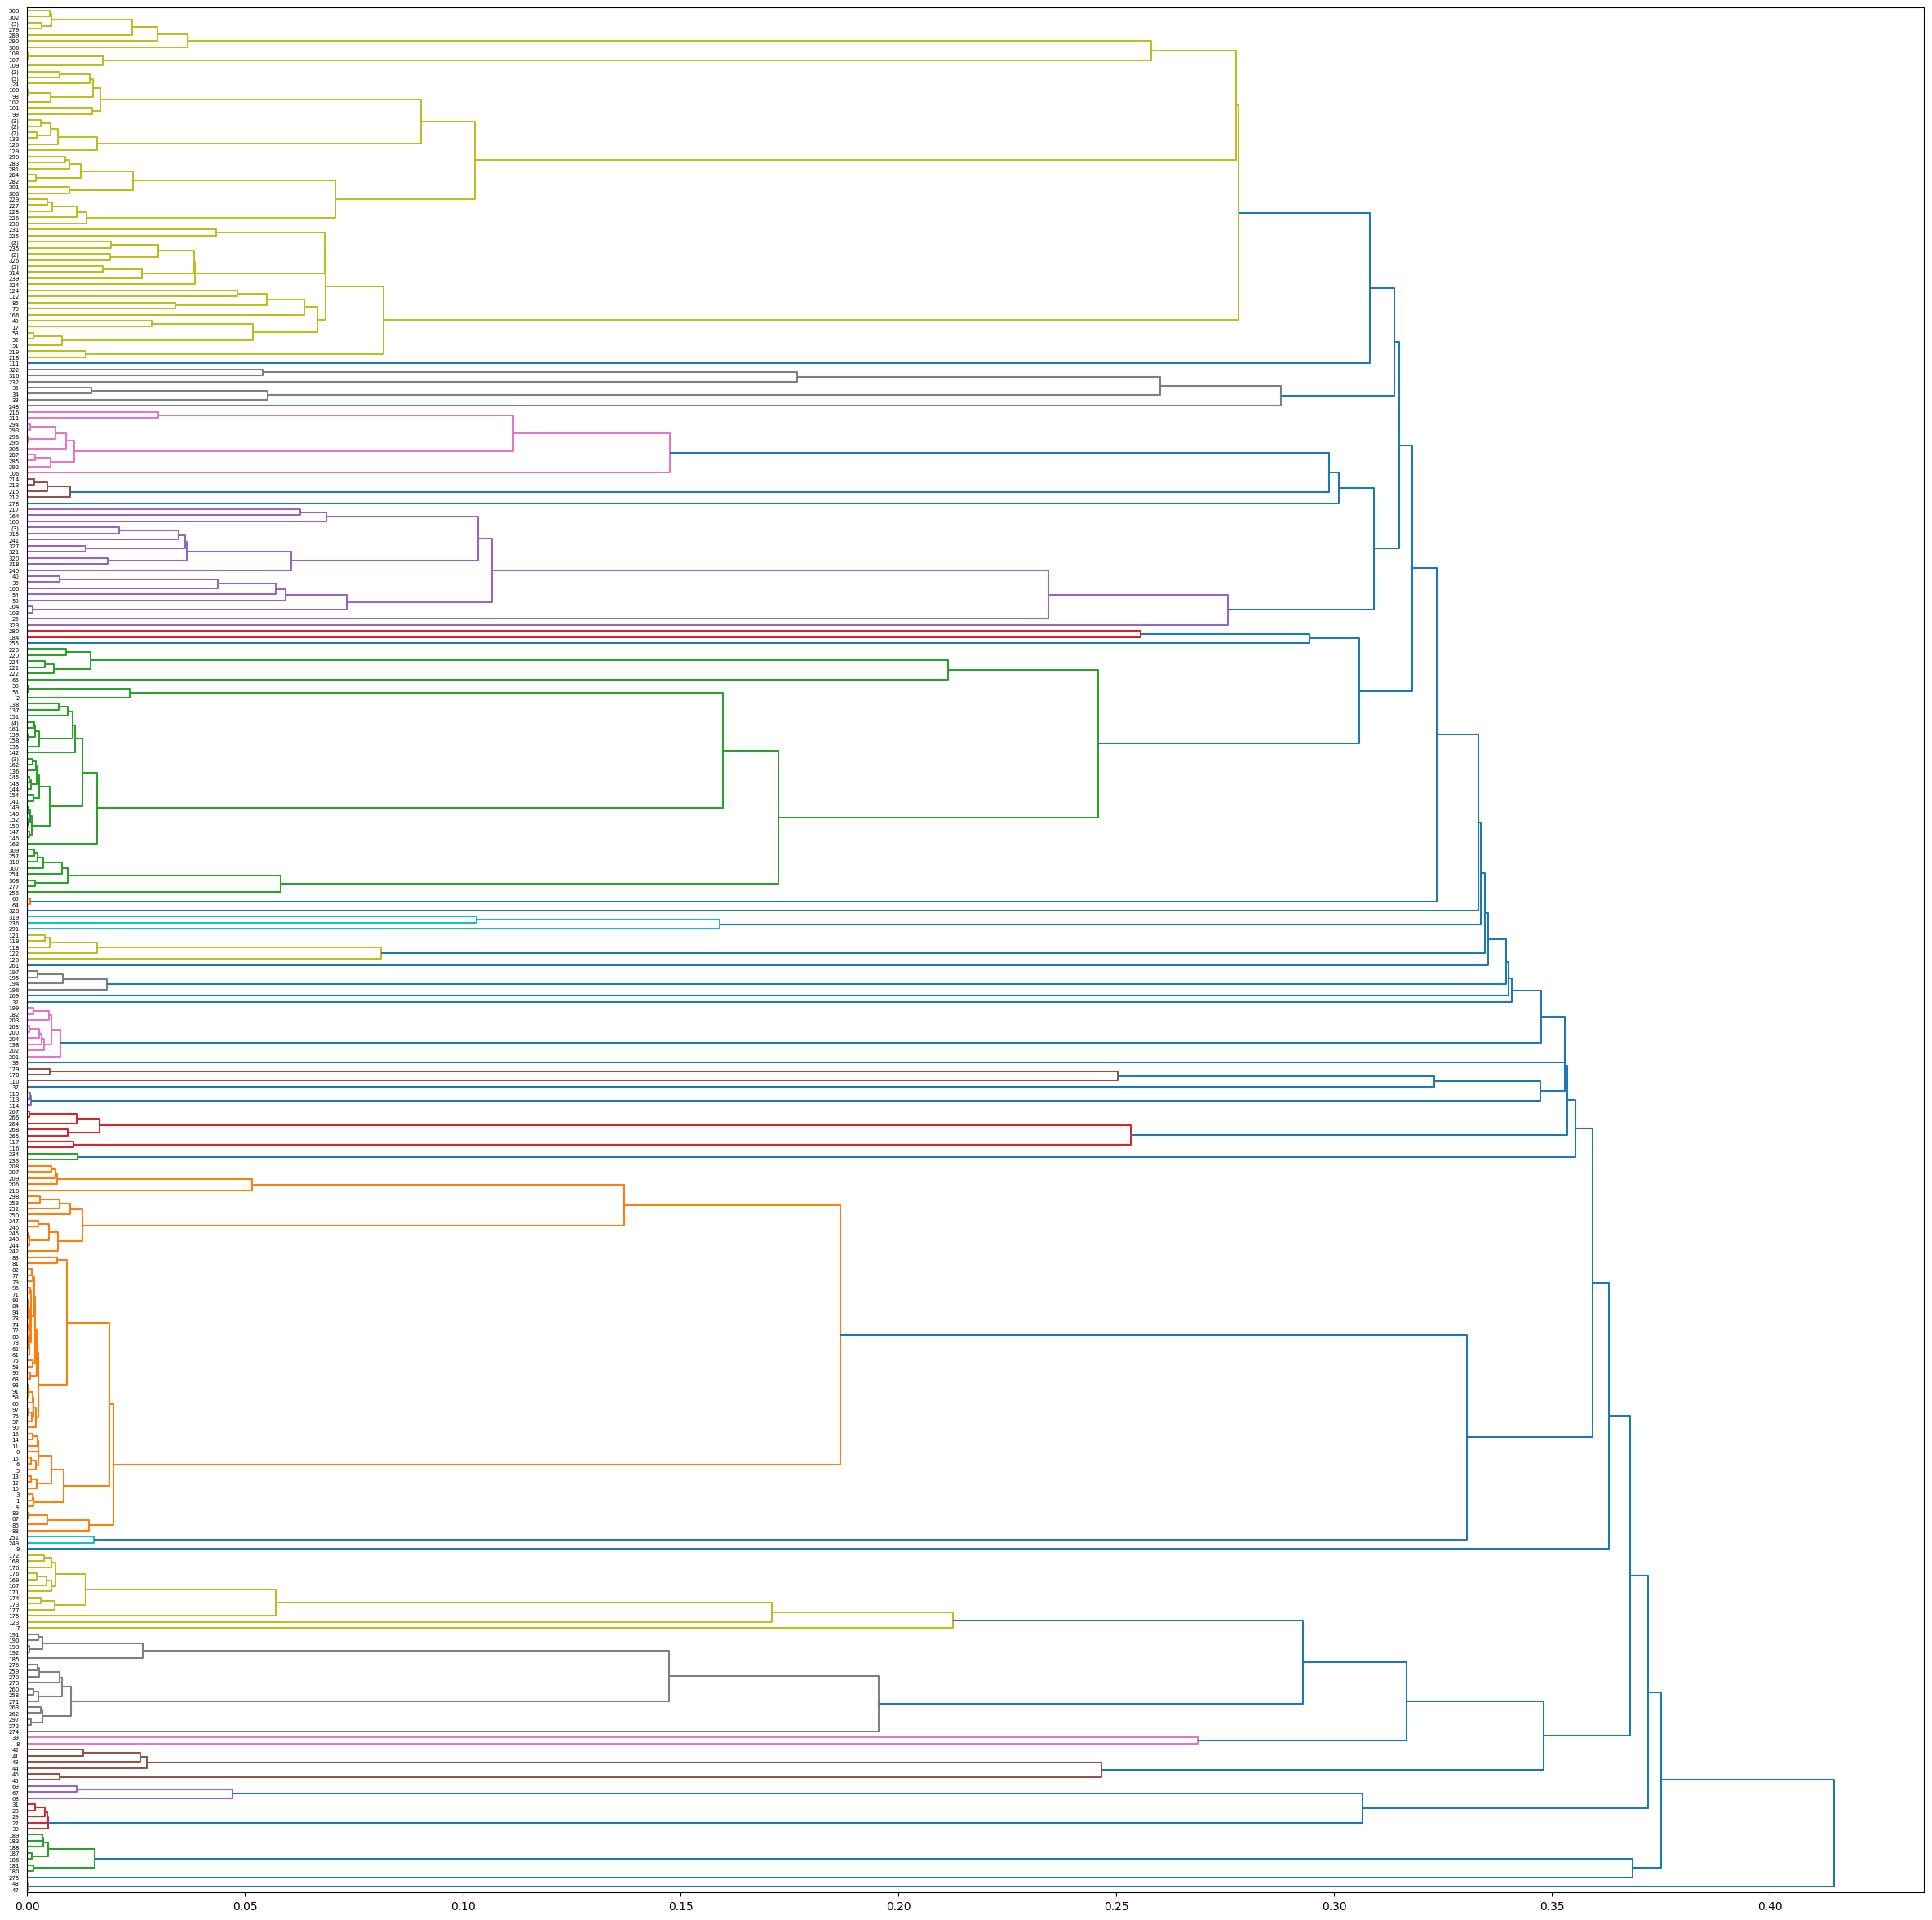

In [40]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(30, 30))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level', p=30)

# Menampilkan plot
plt.show()

In [41]:
scores_pca_cleaned = np.delete(scores_pca, (47, 48, 275), axis=0)

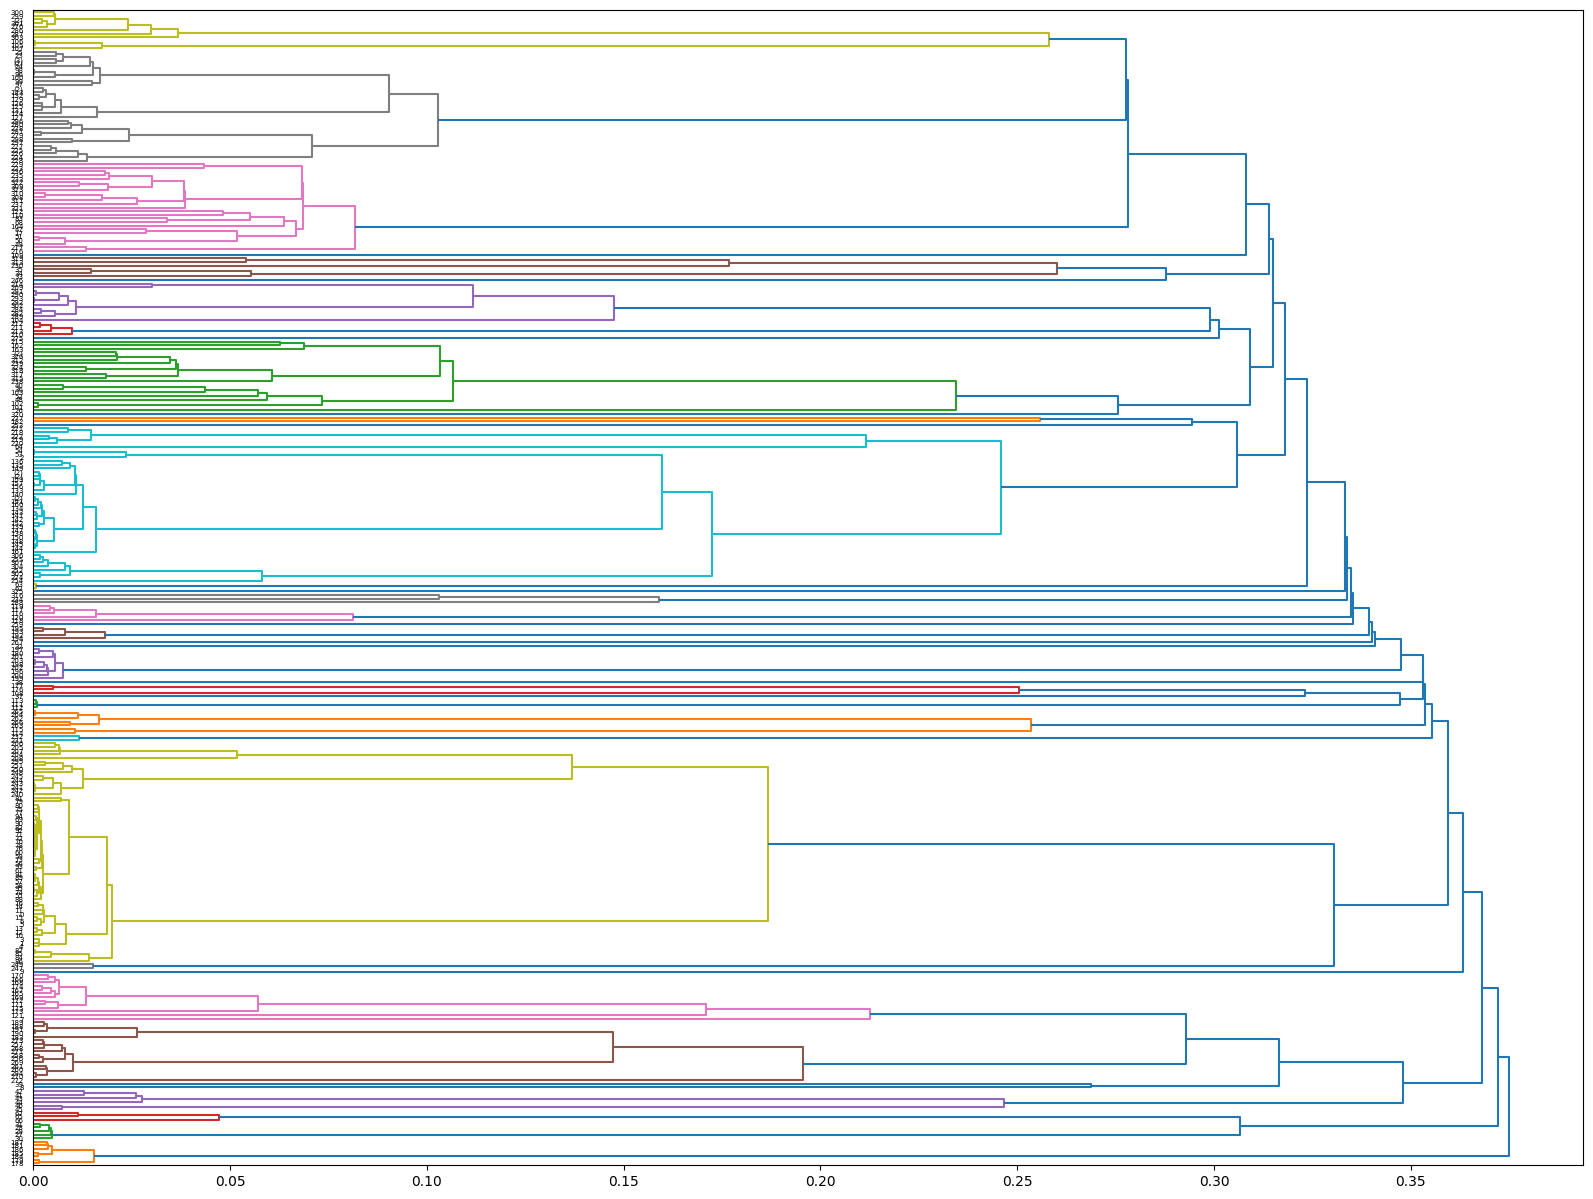

In [42]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca_cleaned, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(20, 15))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level', p=30)

# Menampilkan plot
plt.show()

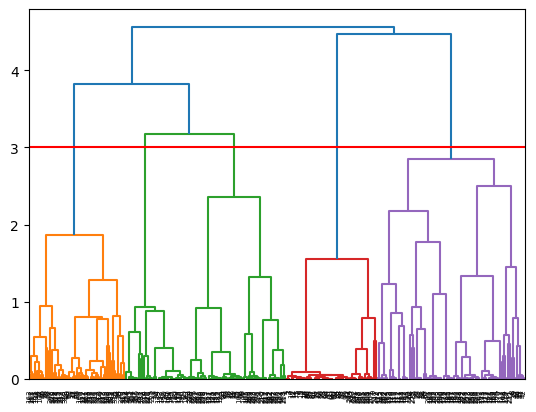

In [56]:
cl_mergings = linkage(scores_pca_cleaned, method='ward', metric="euclidean")

# Menggambar dendrogram
dendrogram(cl_mergings, truncate_mode='level', p = 10)

# Menambahkan garis horizontal untuk tingkat pemotongan
plt.axhline(y=3, color='r', linestyle='-')

# Menampilkan plot
plt.show()

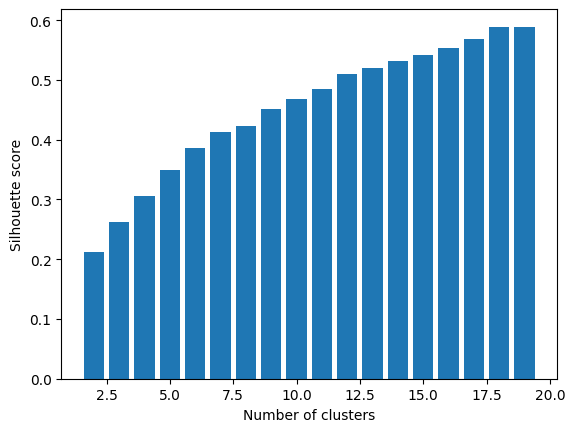

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 20):
    silhouette_scores.append(silhouette_score(scores_pca_cleaned, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(scores_pca_cleaned)))

plt.bar(range(2, 20), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [57]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(scores_pca_cleaned)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 4, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 0,
       0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4,
       4, 4, 4, 3, 1, 1, 1, 1, 1, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1,

In [58]:
dt2 = dt.drop(columns=['Unnamed: 0', 'property_bedrooms'])
df_clust_pca = pd.concat([dt2, pd.DataFrame(scores_pca_cleaned)], axis = 1)
df_clust_pca.columns.values[-6:] = ["comp1", "comp2", "comp3", "comp4", "comp5", "comp6"]
df_clust_pca

,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,beds,...,status,price_per_unit,total_bookings,overall_rating,comp1,comp2,comp3,comp4,comp5,comp6
0,Bingin,PR0057,Teges Asri,Guesthouse,UN1395,Room 1,Standard,1.0,1.0,1.0,...,1,1.170735e+06,138.0,4.702576,-0.344408,-0.054709,0.036802,-0.171670,-0.089058,0.020933
1,Bingin,PR0057,Teges Asri,Guesthouse,UN1396,Room 2,Standard,1.0,1.0,1.0,...,1,1.201892e+06,143.0,4.824885,-0.342763,-0.049590,0.037889,-0.168147,-0.096088,0.026659
2,Bingin,PR0057,Teges Asri,Guesthouse,UN1397,Room 3,Standard,1.0,1.0,1.0,...,1,1.237458e+06,147.0,4.674419,-0.157993,-0.301751,-0.007009,0.108628,-0.153989,0.057367
3,Bingin,PR0057,Teges Asri,Guesthouse,UN1398,Room 4,Standard,1.0,1.0,1.0,...,1,1.195869e+06,130.0,4.810275,-0.343003,-0.050216,0.037742,-0.168569,-0.095264,0.025957
4,Bingin,PR0057,Teges Asri,Guesthouse,UN1399,Room 5,Standard,1.0,1.0,1.0,...,1,1.189912e+06,130.0,4.794189,-0.343253,-0.050901,0.037585,-0.169034,-0.094352,0.025189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ungasan,PR0765,Istana Dalton,Villa,UN2884,Istana Dalton - Entire Villa,Entire Villa,2.0,2.0,2.0,...,1,1.160921e+06,86.0,4.757937,0.196095,0.091015,0.216775,-0.200350,0.257401,-0.084459
327,Ungasan,PR0093,Villa Istana Willy,Villa,UN1223,Istana Willy - Entire Villa,Villa Istana Willy,2.0,2.0,3.0,...,1,1.185920e+06,52.0,4.559767,0.186710,0.094575,0.215115,-0.195983,0.241425,-0.076209
328,Ungasan,PR0557,Blumaya,Villa,UN2786,Villa 1,Villa Blumaya,4.0,4.0,4.0,...,1,1.941470e+06,148.0,4.756757,NaN,NaN,NaN,NaN,NaN,NaN
329,Ungasan,PR0417,NH Residence,Villa,UN2355,NH Residence 3A,3BR Villa 3A,3.0,3.0,3.0,...,1,1.456936e+06,91.0,4.423888,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_clust_pca = df_clust_pca.dropna(subset=['comp4'])

In [60]:
df_clust_pca['cluster'] = pd.DataFrame(y_hc)
df_clust_pca

<ipython-input-60-d30bb8b9984d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust_pca['cluster'] = pd.DataFrame(y_hc)


,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,beds,...,price_per_unit,total_bookings,overall_rating,comp1,comp2,comp3,comp4,comp5,comp6,cluster
0,Bingin,PR0057,Teges Asri,Guesthouse,UN1395,Room 1,Standard,1.0,1.0,1.0,...,1.170735e+06,138.0,4.702576,-0.344408,-0.054709,0.036802,-0.171670,-0.089058,0.020933,2
1,Bingin,PR0057,Teges Asri,Guesthouse,UN1396,Room 2,Standard,1.0,1.0,1.0,...,1.201892e+06,143.0,4.824885,-0.342763,-0.049590,0.037889,-0.168147,-0.096088,0.026659,2
2,Bingin,PR0057,Teges Asri,Guesthouse,UN1397,Room 3,Standard,1.0,1.0,1.0,...,1.237458e+06,147.0,4.674419,-0.157993,-0.301751,-0.007009,0.108628,-0.153989,0.057367,4
3,Bingin,PR0057,Teges Asri,Guesthouse,UN1398,Room 4,Standard,1.0,1.0,1.0,...,1.195869e+06,130.0,4.810275,-0.343003,-0.050216,0.037742,-0.168569,-0.095264,0.025957,2
4,Bingin,PR0057,Teges Asri,Guesthouse,UN1399,Room 5,Standard,1.0,1.0,1.0,...,1.189912e+06,130.0,4.794189,-0.343253,-0.050901,0.037585,-0.169034,-0.094352,0.025189,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Ungasan,PR0432,Villa Kyl 2BR,Villa,UN2262,Entire,Entire,2.0,3.0,2.0,...,1.548982e+06,174.0,4.555665,0.278783,-0.122287,0.138602,0.031103,0.162630,-0.068143,3
324,Ungasan,PR0851,Casa Aimia,Villa,UN3081,Entire,Entire Villa,3.0,3.0,3.0,...,1.512218e+06,14.0,4.964286,0.177796,0.085340,0.192097,-0.193639,0.245313,-0.100786,3
325,Ungasan,PR0864,Lengkungan Villas,Villa,UN3099,Villa 1,Villa Lengkungan 1,2.0,2.0,2.0,...,2.349751e+06,5.0,4.928571,0.464190,-0.120647,0.285340,0.011480,0.260888,0.262157,3
326,Ungasan,PR0765,Istana Dalton,Villa,UN2884,Istana Dalton - Entire Villa,Entire Villa,2.0,2.0,2.0,...,1.160921e+06,86.0,4.757937,0.196095,0.091015,0.216775,-0.200350,0.257401,-0.084459,3


In [61]:
df_clust_pca1 = df_clust_pca.iloc[ :, -7:-1]
df_clust_pca1

,comp1,comp2,comp3,comp4,comp5,comp6
0,-0.344408,-0.054709,0.036802,-0.171670,-0.089058,0.020933
1,-0.342763,-0.049590,0.037889,-0.168147,-0.096088,0.026659
2,-0.157993,-0.301751,-0.007009,0.108628,-0.153989,0.057367
3,-0.343003,-0.050216,0.037742,-0.168569,-0.095264,0.025957
4,-0.343253,-0.050901,0.037585,-0.169034,-0.094352,0.025189
...,...,...,...,...,...,...
323,0.278783,-0.122287,0.138602,0.031103,0.162630,-0.068143
324,0.177796,0.085340,0.192097,-0.193639,0.245313,-0.100786
325,0.464190,-0.120647,0.285340,0.011480,0.260888,0.262157
326,0.196095,0.091015,0.216775,-0.200350,0.257401,-0.084459


<ipython-input-62-af308c8c0668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust_pca1['cluster'] = df_clust_pca['cluster']


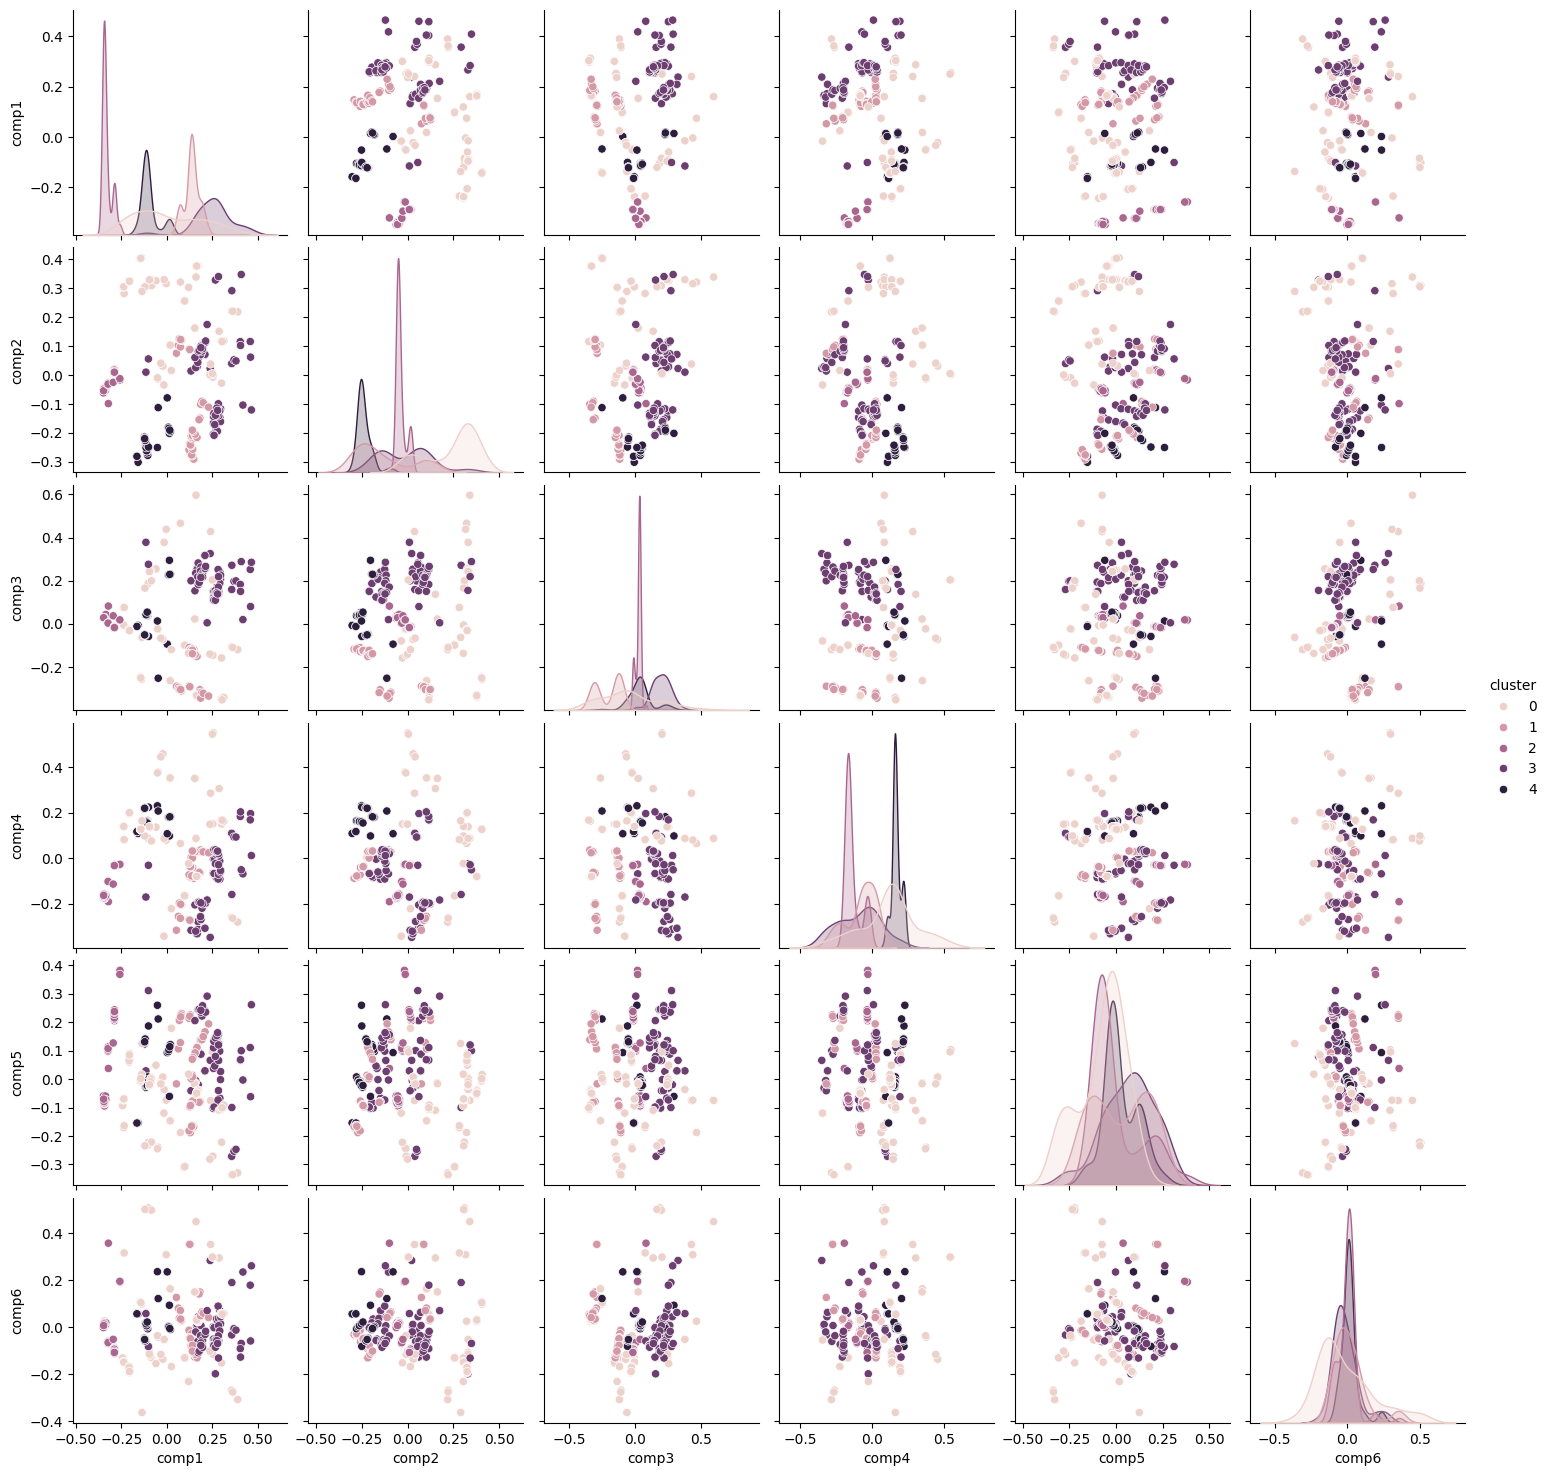

In [62]:
df_clust_pca1['cluster'] = df_clust_pca['cluster']
sns.pairplot(df_clust_pca1[0:], hue='cluster')

### Transpose PCA

In [ ]:
pc = np.transpose(scores_pca_cleaned)

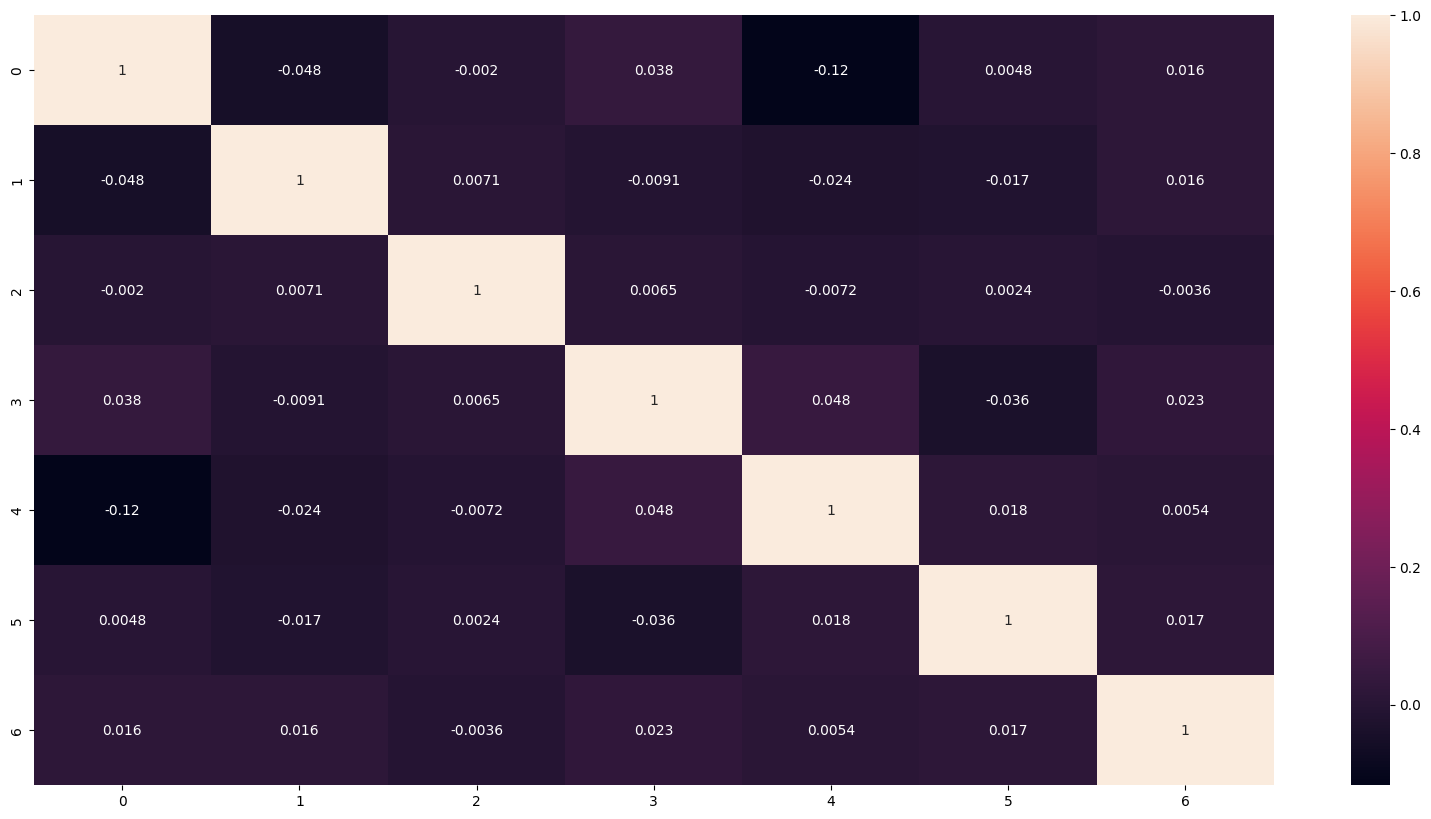

In [ ]:
corrmat = np.corrcoef(pc)
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [ ]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4], 'P6':pc[5], })

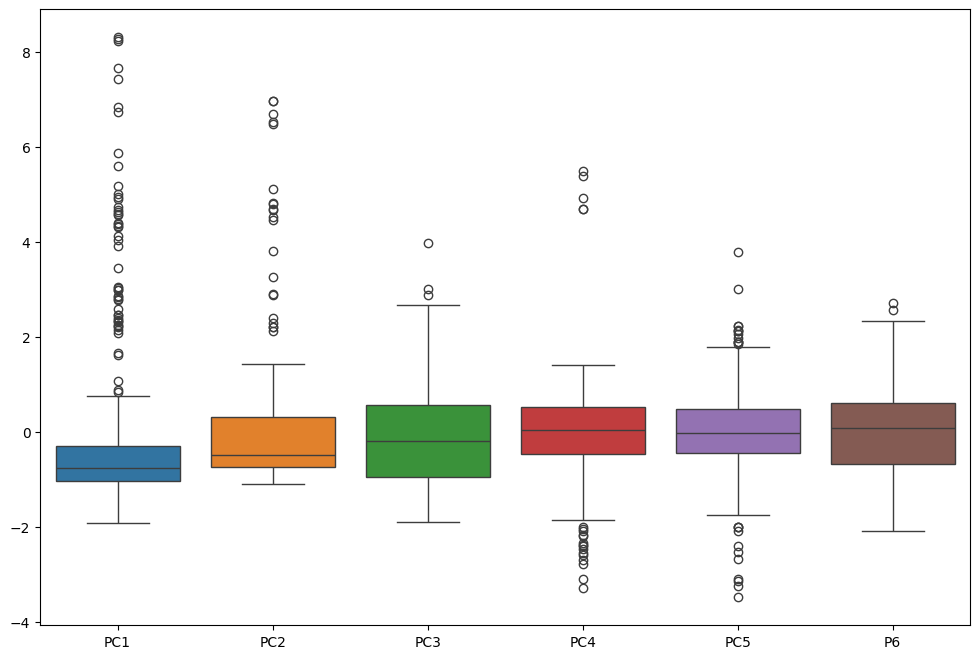

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [ ]:
pcs_df2.shape

(326, 6)

In [ ]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,P6
0,-0.877408,-0.490673,-1.337792,-0.372061,-0.210223,0.811680
1,-0.871406,-0.580552,-1.558296,-0.145479,-0.511862,0.582064
2,-0.837355,-0.471020,-1.283161,-0.431606,-0.146620,0.890641
3,-0.873414,-0.569783,-1.532077,-0.172315,-0.475648,0.608679
4,-0.875245,-0.557937,-1.503174,-0.201929,-0.435830,0.638221


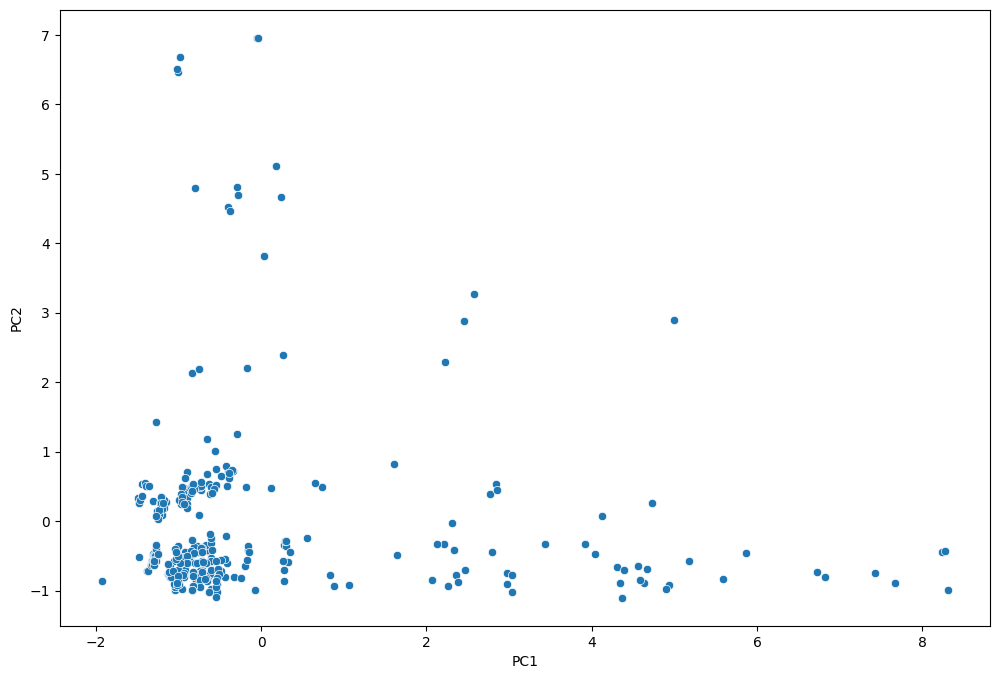

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()